## OECD Datasets

Containing the following columns:
* cname (Country name)
* year (Year of record)
* Civil Justice is Free of Corruption ( Project, W. J. (2023). WJP Rule of Law Index 2022. https://worldjusticeproject.org/rule-of-law-index/)
* Criminal System is Free of Corruption (Project, W. J. (2023). WJP Rule of Law Index 2022. https://worldjusticeproject.org/rule-of-law-index/)
* Corruption Commission Present in Constitution (Elkins, Z., & Ginsburg, T. (2022). Characteristics of national constitutions, version 4.0. In Comparative Constitutions Project.)
* Civil Rights (Donner, S., Hartmann, H., Härterich, C., & Steinkamp, S. (2022). Transformation index of the bertelsmann stiftung 2022. Bertelsmann Stiftung.)
* Anti Corruption Policy (Donner, S., Hartmann, H., Härterich, C., & Steinkamp, S. (2022). Transformation index of the bertelsmann stiftung 2022. Bertelsmann Stiftung.)
* The Bayesian Corruption Indicator (Standaert, S. (2015). Divining the level of corruption: A bayesian state-space approach. Journal of Comparative Economics, 43(3), 782–803.)

Description of columns:
https://www.qogdata.pol.gu.se/dataarchive/qog_bas_jan23.pdf

Download filter for datasets: https://datafinder.qog.gu.se/downloads?download=bti_acp,bti_cr,ccp_cc,ess_health,ess_trlegal,ess_trpeople,wef_qoi,undp_hdi,iiag_he,pwt_hci,wjp_abs_cor,wjp_civ_just,wjp_cj_cor,wjp_crsys_cor,bci_bci,wbgi_cce,wdi_litrad,wdi_refasy,wdi_refori

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
oecd_data = pd.read_csv("../data/processed/oecd.csv")
print(oecd_data.describe(include='all'))

          cname        year Civil Justice is Free of Corruption  \
count       743         743                                 279   
unique       36          21                                  69   
top     Albania  2013-01-01                                0,77   
freq         21          36                                  13   

       Criminal System is Free of Corruption  \
count                                    279   
unique                                    66   
top                                     0,75   
freq                                      12   

       Corruption Commission Present in Constitution Civil Rights  \
count                                            659          160   
unique                                             1            7   
top                                             2,00         8,00   
freq                                             659           57   

       Anti Corruption Policy The Bayesian Corruption Indicator  
count      

In [96]:
oecd_data.rename(columns={'year': 'Year'}, inplace=True)
oecd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 742
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           703 non-null    object 
 1   Civil Justice is Free of Corruption            269 non-null    float64
 2   Criminal System is Free of Corruption          269 non-null    float64
 3   Corruption Commission Present in Constitution  640 non-null    float64
 4   Civil Rights                                   151 non-null    float64
 5   Anti Corruption Policy                         151 non-null    float64
 6   The Bayesian Corruption Indicator              640 non-null    float64
 7   ISO3 Code                                      703 non-null    object 
dtypes: float64(6), object(2)
memory usage: 49.4+ KB


In [88]:
oecd_data['Year'] = pd.to_datetime(oecd_data['Year']).dt.strftime('%Y')
oecd_data.head()


,cname,Year,Civil Justice is Free of Corruption,Criminal System is Free of Corruption,Corruption Commission Present in Constitution,Civil Rights,Anti Corruption Policy,The Bayesian Corruption Indicator
0,Albania,2003,NaN,NaN,"2,00",NaN,NaN,"58,32"
1,Albania,2004,NaN,NaN,"2,00",NaN,NaN,"57,87"
2,Albania,2005,NaN,NaN,"2,00","8,00","4,00","57,98"
3,Albania,2006,NaN,NaN,"2,00",NaN,NaN,"57,75"
4,Albania,2007,NaN,NaN,"2,00","8,00","4,00","57,44"


In [89]:
oecd_data["Year"].unique()

array(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [83]:
def apply_iso3_code(df, countries_df):
    """
    Merges 'df' (with 'cname') against 'countries_df' (with 'Country Name' and 'Country Code')
    to add the 'ISO3 Code' column to 'df'.

    Parameters:
        df (pd.DataFrame): Your original DataFrame with a 'cname' column.
        countries_df (pd.DataFrame): DataFrame with at least two columns:
                                     - 'Country Name': textual name of the country
                                     - 'Country Code': ISO3 code (e.g. FRA, DEU, etc.)

    Returns:
        pd.DataFrame: Updated DataFrame that includes the 'ISO3 Code'.
    """

    # Merge on the country name
    merged = df.merge(
        countries_df[['Country', 'ISO3 Code']],
        how='left',
        left_on='cname',
        right_on='Country'
    )


    # (Optional) Filter out rows with missing ISO3 codes, 
    # if you only want to keep countries that have a valid code:
    merged = merged[~merged['ISO3 Code'].isna()]

    return merged

# --- Example usage ---
# Suppose `df` is your 8-column DataFrame shown above, and
# `countries_df` is a DataFrame that contains a mapping
# of valid European countries to their ISO3 codes.

# df_with_iso3 = apply_iso3_code(df, countries_df)
# print(df_with_iso3.head())


In [90]:
countries = pd.read_csv("../data/processed/europe_countries.csv")
oecd_data = apply_iso3_code(oecd_data, countries)
oecd_data.head()

,cname,Year,Civil Justice is Free of Corruption,Criminal System is Free of Corruption,Corruption Commission Present in Constitution,Civil Rights,Anti Corruption Policy,The Bayesian Corruption Indicator,Country,ISO3 Code
0,Albania,2003,NaN,NaN,"2,00",NaN,NaN,"58,32",Albania,ALB
1,Albania,2004,NaN,NaN,"2,00",NaN,NaN,"57,87",Albania,ALB
2,Albania,2005,NaN,NaN,"2,00","8,00","4,00","57,98",Albania,ALB
3,Albania,2006,NaN,NaN,"2,00",NaN,NaN,"57,75",Albania,ALB
4,Albania,2007,NaN,NaN,"2,00","8,00","4,00","57,44",Albania,ALB


In [92]:
oecd_data = oecd_data.drop(axis=1, labels=["Country"])

In [95]:
oecd_data.head()

,Year,Civil Justice is Free of Corruption,Criminal System is Free of Corruption,Corruption Commission Present in Constitution,Civil Rights,Anti Corruption Policy,The Bayesian Corruption Indicator,ISO3 Code
0,2003,NaN,NaN,2.0,NaN,NaN,58.32,ALB
1,2004,NaN,NaN,2.0,NaN,NaN,57.87,ALB
2,2005,NaN,NaN,2.0,8.0,4.0,57.98,ALB
3,2006,NaN,NaN,2.0,NaN,NaN,57.75,ALB
4,2007,NaN,NaN,2.0,8.0,4.0,57.44,ALB


In [94]:
for col in oecd_data.columns:
    if col not in ["Year", "ISO3 Code"]:
        oecd_data[col] = oecd_data[col].replace(',', '.', regex=True)  # Replace commas with dots
        oecd_data[col] = pd.to_numeric(oecd_data[col], errors='coerce')  # Convert to numeric, coercing errors to NaN


In [98]:
oecd_data['Year'] = pd.to_numeric(oecd_data['Year'], errors='coerce')


In [99]:
oecd_data = oecd_data[oecd_data['Year'] >= 2012]


In [100]:
oecd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 9 to 742
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           403 non-null    int64  
 1   Civil Justice is Free of Corruption            269 non-null    float64
 2   Criminal System is Free of Corruption          269 non-null    float64
 3   Corruption Commission Present in Constitution  340 non-null    float64
 4   Civil Rights                                   85 non-null     float64
 5   Anti Corruption Policy                         85 non-null     float64
 6   The Bayesian Corruption Indicator              340 non-null    float64
 7   ISO3 Code                                      403 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 28.3+ KB


In [ ]:
numeric_columns = oecd_data.drop(columns=['year'])

correlation_matrix = numeric_columns.corr()

#Sorting
sorted_correlation = correlation_matrix['The Bayesian Corruption Indicator'].sort_values(ascending=False)
print(sorted_correlation)

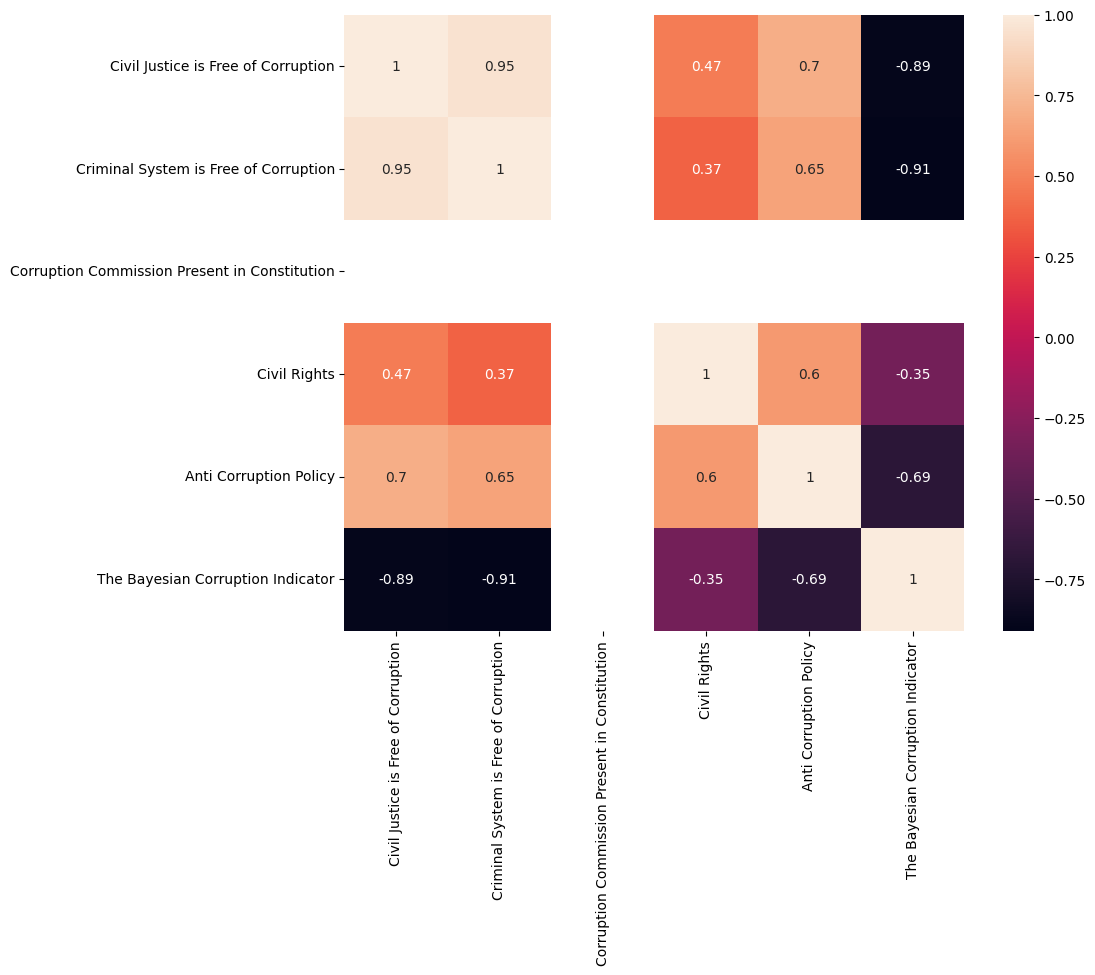

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


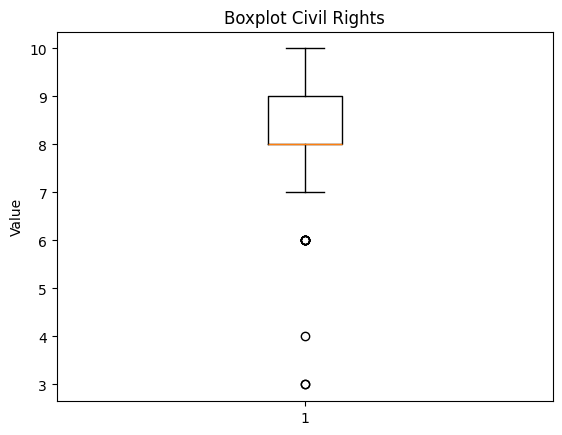

In [6]:
#plt.hist(oecd_data['year'], bins=20)
#plt.title('Year distribution')
#plt.show()

plt.boxplot(oecd_data['Civil Rights'].dropna())
plt.title('Boxplot Civil Rights')
plt.ylabel('Value')
plt.show()

In [8]:
oecd_data.to_csv("../data/processed/oecd_years.csv", index=False, index_label=False)

In [9]:
oecd_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   cname                                          0 non-null      float64
 1   year                                           0 non-null      object 
 2   Civil Justice is Free of Corruption            279 non-null    float64
 3   Criminal System is Free of Corruption          279 non-null    float64
 4   Corruption Commission Present in Constitution  659 non-null    float64
 5   Civil Rights                                   160 non-null    float64
 6   Anti Corruption Policy                         160 non-null    float64
 7   The Bayesian Corruption Indicator              678 non-null    float64
dtypes: float64(7), object(1)
memory usage: 46.6+ KB
